# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

---

### Compatibilità far Dinamica Molecolare e metodi Monte Carlo

Si considera di nuovo il caso in cui si vuole simulare la dinamica molecolare di un ensemble microcanonico costituito da $N=108$ molecole di Argon in una singola cella, nei tre stati solido, liquido, gassoso. In questo caso tuttavia non si vuole utilizzare l'algoritmo di Verlet, ma l'algoritmo di Metropolis.

In questo modo, siamo in grado di stimare in maniera quantitativa la taglia da assegnare ai blocchi di misura del metodo data blocking, in base al quale vengono poi realizzate le misure di energia potenziale per particella e pressione.

In tal caso, considerando il sistema nello stato iniziale $\mu$, si calcola l'energia (potenziale) del sistema $E_\mu$. Dopodichè si sceglie una particella casualmente e viene impressa su di essa uno spostamento casuale (entro un certo range), per cui il sistema si troverà nel nuovo stato $\nu$, con energia $E_\nu$. Si considera dunque la probabilità di accettazione $\alpha=e^{\beta(E_\mu-E_\nu)}$, per cui se $E_\nu < E_\mu$, allora la mossa viene accettata, altrimeti essa ha probabilità $\alpha$ di venire accettata.

Precedentemente per le $N$ particelle di Argon nella cella è stato definito un raggio di cutoff $r_{cut}$ oltre il quale poteva essere approssimata l'interazione fra due particelle, e tale approssimazione influiva sul calcolo dell'energia e della pressione del sistema. In questo caso si considera comunque un raggio di cutoff, ma si effettua una Tail Correction all'energia e alla pressione tramite la funzione di distribuzione radiale $g(r)$.

Tale funzione esprime la probabilità di trovare una qualunque coppia di particelle a distanza $r$ confrontata con la medesima probabilità che si avrebbe nel caso di  particelle indipendenti (e quindi di un gas ideale), e si ha che le Tail Corrections per i contributi di singola particella all'energia potenziale e alla pressione sono determinate da:

$$\langle V \rangle_{tail} = 2\pi\rho N\int_{r_c}^{\infty}r^2V(r)g(r)\,dr\simeq 2\pi\rho N\int_{r_c}^{\infty}r^2V(r)\,dr$$

$$\Downarrow$$

$$\frac{\langle V \rangle_{tail}}{N} = 2\pi\rho\int_{r_c}^{\infty}4 r^2\Bigg[\Big(\frac{1}{r}\Big)^{12}-\Big(\frac{1}{r}\Big)^6\Bigg]dr = 8\pi\rho\Big(\frac{1}{9r_c^9}-\frac{1}{3r_c^3}\Big)$$

$$\frac{\langle P \rangle_{tail}}{N} \simeq \frac{2}{3}\pi\rho\int_{r_c}^{\infty}48r^2\Bigg[\Big(\frac{1}{r}\Big)^{12}-\frac{1}{2}\Big(\frac{1}{r}\Big)^6\Bigg]dr=32\pi\rho\Big(\frac{1}{9r_c^9}-\frac{1}{6r_c^3}\Big)$$

Anche in questo caso sono state utilizzate le unità naturali, per cui $\epsilon,\sigma=1$.

Nella stima dell'energia potenziale e della pressione del sistema, tramite il metodo <font face="Courier"> Averages(iblk)</font>, si aggiungono dunque i contributi descritti appena sopra, moltiplicando la tail correction per il numero delle particelle, poichè l'osservabile che si vuole calcolare è il contributo di tutte le particelle alla pressione.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

---

Come già detto in precedenza, in questo caso si effettuano le simulazioni dell'evoluzione temporale dell'ensemble microcanonico (numero di particelle $N$, volume $V$ e $T$ costanti) attraverso un algoritmo di Metropolis. Dunque, anzichè produrre le configurazioni risolvendo le equazioni del moto a $E$ costante (come viene fatto attraverso l'algoritmo di Verlet), in questo caso le configurazioni vengono generate a temperatura costante campionando una catena di Markov adeguata a realizzare il campionamento del peso statistico di Boltzmann.
Il passo dell'algoritmo $x_i \rightarrow x_i + \delta$ viene generato secondo una probabilità di transizione $T(x|y)$ uniforme, e la prima accortezza a cui è necessario porre attenzione è determinare la lunghezza del passo più consona a rispettare la regola empirica del $50\%$. Inoltre in questo caso vengono implementati $M=10000$ step dell'algoritmo di Metropolis.

Per quanto riguarda gli stati solido e liquido, sono state scelti i parametri $\delta_{sol}=0.11, \delta_{liq}=0.2$ per avere un'accettazione del $50\%$ circa, mentre per lo stato gassoso, che è determinato da una densità molto più bassa delle altre fasi, ed è quindi statisticamente facile riuscire a modificare la posizione delle particelle, è stato scelto il parametro $\delta_{gas}=7.0$, per cui si ha una probabilità di accettazione del $62\%$ circa.

Come studio preliminare, analogalmente alla simulazione del sistema tramite algoritmo di Verlet, bisogna equilibrare il sistema in tutte le sue fasi per poi poter andare ad effettuare le misurazioni. Nei grafici sottostanti viene mostrato l'andamento ai primi passi dell'energia per particella $U/N$ e la pressione $P$ nelle tre diverse fasi.
Nel caso della simulazione Monte-Carlo, l'equilibrazione viene effettuata solamente appliacndo un certo numero di mosse dell'algoritmo di Metropolis, in questo caso $n_{eq}=1000$ al sistema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Si abbandonano le unità naturali
m = 39.948* 1.66054*10**(-27) # kg
sigma = 0.34* 10**(-9)        # m
k_b = 1.380649* 10**(-23)     # J/K
eps = 120* k_b                # J

In [2]:
# I dati sono salvati nella cartella 'Equilibrazione' poichè inizialmente vengono posti 1000 step di equilibrazione
# all'algoritmo: opzione che poi viene accantonata. Per far sì di non perdere i dati li salvo dunque al di fuori
# della cartella dove è presente il file .cpp

data_solid_u_eq = np.loadtxt('MC/Equilibrazione/solid_u_eq.dat')
data_solid_p_eq = np.loadtxt('MC/Equilibrazione/solid_p_eq.dat')
data_liquid_u_eq = np.loadtxt('MC/Equilibrazione/liquid_u_eq.dat')
data_liquid_p_eq = np.loadtxt('MC/Equilibrazione/liquid_p_eq.dat')
data_gas_u_eq = np.loadtxt('MC/Equilibrazione/gas_u_eq.dat')
data_gas_p_eq = np.loadtxt('MC/Equilibrazione/gas_p_eq.dat')

steps_solid = data_solid_u_eq[:, 0]
steps_liquid= data_liquid_u_eq[:, 0]
steps_gas = data_gas_u_eq[:, 0]

solid_u_eq = data_solid_u_eq[:, 1]
solid_p_eq = data_solid_p_eq[:, 1]
liquid_u_eq = data_liquid_u_eq[:, 1]
liquid_p_eq = data_liquid_p_eq[:, 1]
gas_u_eq = data_gas_u_eq[:, 1]
gas_p_eq = data_gas_p_eq[:, 1]

solid_p_eq = solid_p_eq*eps/sigma**3
solid_u_eq = solid_u_eq*eps

liquid_p_eq = liquid_p_eq*eps/sigma**3
liquid_u_eq = liquid_u_eq*eps

gas_p_eq = gas_p_eq*eps/sigma**3
gas_u_eq = gas_u_eq*eps

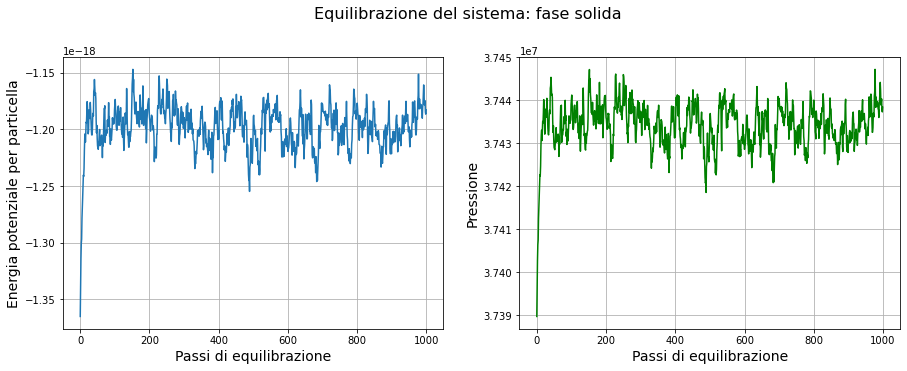

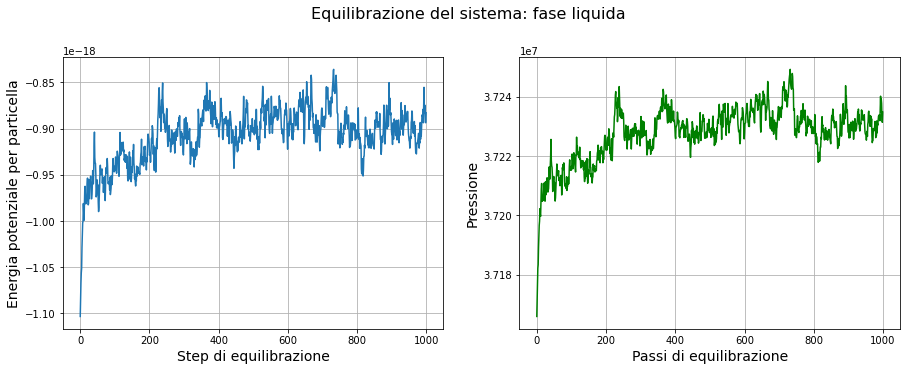

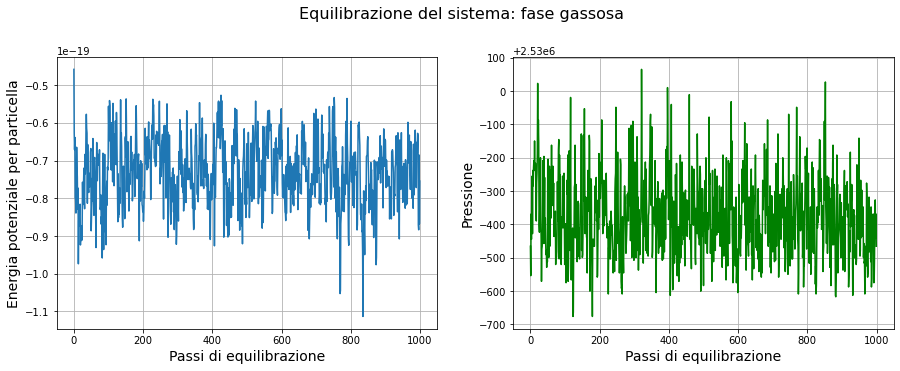

In [3]:
#Fase solida
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
# plt.title('Potential energy per particle:',fontsize=14)
plt.plot(steps_solid, solid_u_eq)
plt.xlabel('Passi di equilibrazione', fontsize=14)
plt.ylabel('Energia potenziale per particella',fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
# plt.title('Pressure:',fontsize=14)
plt.plot(steps_solid, solid_p_eq,color='green')
plt.xlabel('Passi di equilibrazione',fontsize=14)
plt.ylabel('Pressione',fontsize=14)
plt.grid(True)

plt.suptitle('Equilibrazione del sistema: fase solida',fontsize=16,y=1.02)
plt.show()


#Fase liquida
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# plt.title('Potential energy per particle:',fontsize=14)
plt.plot(steps_liquid, liquid_u_eq)
plt.xlabel('Step di equilibrazione',fontsize=14)
plt.ylabel('Energia potenziale per particella',fontsize=14)
# plt.xlim(-100,2000)
plt.grid(True)

plt.subplot(1,2,2)
# plt.title('Pressure:',fontsize=14)
plt.plot(steps_liquid, liquid_p_eq,color='green')
plt.xlabel('Passi di equilibrazione',fontsize=14)
plt.ylabel('Pressione',fontsize=14)
plt.grid(True)

plt.suptitle('Equilibrazione del sistema: fase liquida',fontsize=16,y=1.02)
plt.show()


#Fase gassosa
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# plt.title('Potential energy per particle:',fontsize=14)
plt.plot(steps_gas, gas_u_eq)
plt.xlabel('Passi di equilibrazione',fontsize=14)
plt.ylabel('Energia potenziale per particella',fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
# plt.title('Pressure:',fontsize=14)
plt.plot(steps_gas, gas_p_eq,color='green')
plt.xlabel('Passi di equilibrazione',fontsize=14)
plt.ylabel('Pressione',fontsize=14)
plt.grid(True)

plt.suptitle('Equilibrazione del sistema: fase gassosa',fontsize=16,y=1.02)
plt.show()

Dai grafici sovrastanti risulta evidente che l'equilibrazione viene completata entro i primi passi dell'algoritmo. In questo caso, per tutte e tre le fasi, sono stati effettuati in tutto $n_{eq}=1000$ step di equilibrazione totali, tuttavia per quanto riguarda la fase solida e liquida sono necessari rispettivamente $100$ e $250$ step, mentre nel caso del gas la fase di equilibrazione è immediata alla partenza.

---

### Funzione di autocorrelazione

Ora, attraverso un set di misure istantanee della simulazione, tramite uno script di Phyton si vuole studiare l'andamento dell'autocorrelazione delle due grandezze termodinamiche di interesse in funzione dello step temporale. L'autocorrelazione è una misura statistica che indica la correlazione di un set di dati con sè stesso, considerando gli spostamenti temporali. Essa fornisce informazioni sulla presenza di una struttura correlata o di un pattern nella serie di dati.

Così facendo si può determinare approssimativamente la giusta dimensione dei blocchi contenenti i valori istantanei di energia potenziale per particelle e pressione in modo da eseguire il data blocking in modo che le misure non siano correlate, e l'errore su di esse non venga sottostimato.

L'autocorrelazione $\Omega$ fra un set di misure dell'osservabile $\xi$, misurate secondo l'ordine temporale $t_1,t_2,...,t_{max}$, al tempo $t$ è determinata da

$$\Omega_{\xi}(t) = \frac{1}{\sigma^2_\xi}\Bigg[\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}\xi(t')\xi(t'+t)-\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}\xi(t')\cdot\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}\xi(t'+t) \Bigg]\,\,,$$

dove $\sigma_\xi^2$ è la varianza sul set di misure dell'osservabile $\xi$.

In [4]:
# I dati sono salvati nella cartella 'Istantanei' poichè sono stati implementati da 5000 step dell'algoritmo di Metr.
# In seguito si utilizzerà il data blocking con un numero diverso di step.
# Per far sì di non perdere i dati li salvo dunque al di fuori della cartella dove è presente il file .cpp

solid_pot = np.loadtxt('MC/Istantanei/solid_ist_epot.dat')
solid_pressure = np.loadtxt('MC/Istantanei/solid_ist_pres.dat')

liquid_pot = np.loadtxt('MC/Istantanei/liquid_ist_epot.dat')
liquid_pressure = np.loadtxt('MC/Istantanei/liquid_ist_pres.dat')

gas_pot = np.loadtxt('MC/Istantanei/gas_ist_epot.dat')
gas_pressure = np.loadtxt('MC/Istantanei/gas_ist_pres.dat')

In [5]:
def AutoCorrelation(n_points,obs):
    # Creo un vettore t che va da 0 a n_points-1
    t=np.arange(n_points)
    # t_max è la lunghezza del vettore obs
    t_max=len(obs)
    # factor contiene tre vettori di zeri, con lunghezza n_points
    factor = [np.zeros(n_points) for j in range(3)]
    # factor[0] è la somma dei prodotti dell'osservabile calcolata da 0 a t e da t_max-t a t_max, e divisa per (t_max-t)
    factor[0] = [sum(obs[0:t_max-i]*obs[i:t_max]) for i in t]/(t_max-t)
    # factor[1] è la somma dell'osservabile calcolata da 0 a (t_max-t), e divisa per (t_max-t)
    factor[1] = [sum(obs[0:t_max-i]) for i in t]/(t_max-t)
    # factor[1] è la somma dell'osservabile calcolata da t a t_max, e divisa per (t_max-t)
    factor[2] = [sum(obs[i:t_max]) for i in t]/(t_max-t)
    factor4 = (np.std(obs))**2
    return (factor[0]-factor[1]*factor[2])/factor4

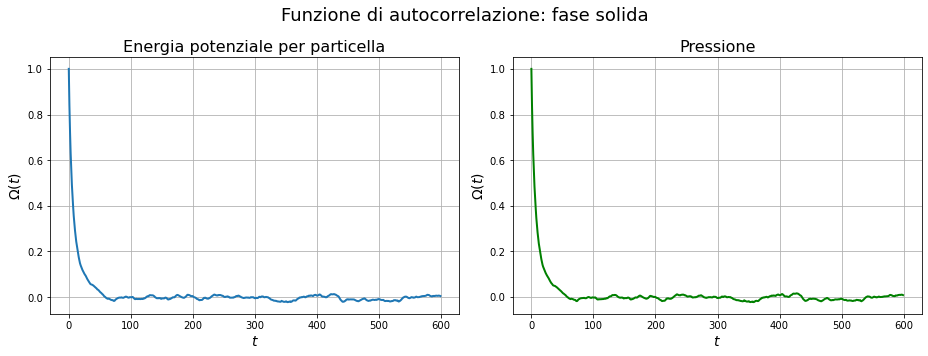

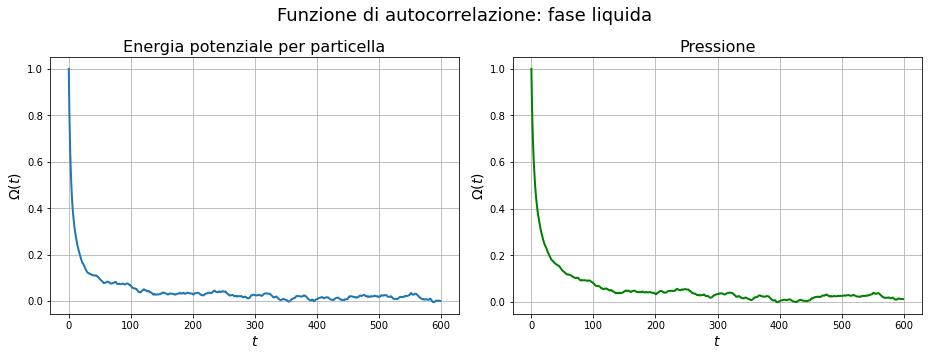

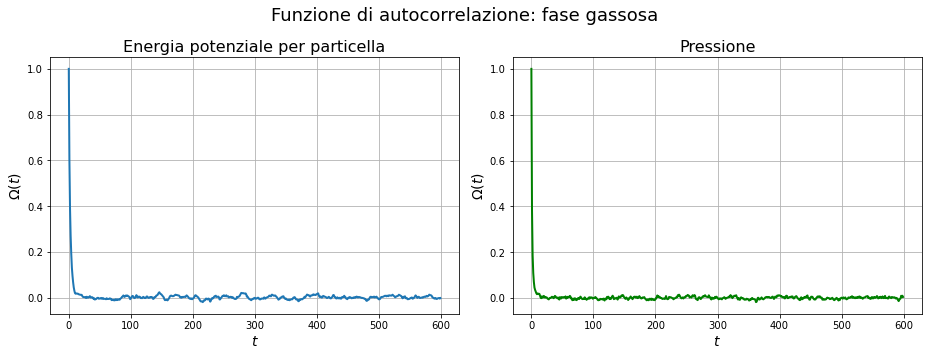

In [6]:
# Fase solida (valuto sui primi 600 valori)
autocorrelationE = AutoCorrelation(600,solid_pot)
autocorrelationP = AutoCorrelation(600,solid_pressure)

plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Energia potenziale per particella',fontsize=16)
plt.plot(autocorrelationE, lw=2)
plt.xlabel('$t$',fontsize=14)
plt.ylabel(r'$\Omega(t)$',fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Pressione',fontsize=16)
plt.plot(autocorrelationP,lw=2, color='green')
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$\Omega(t)$',fontsize=14)
plt.grid(True)

plt.suptitle('Funzione di autocorrelazione: fase solida',fontsize=18)
plt.tight_layout()


# Fase liquida
autocorrelationE = AutoCorrelation(600,liquid_pot)
autocorrelationP = AutoCorrelation(600,liquid_pressure)

plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Energia potenziale per particella',fontsize=16)
plt.plot(autocorrelationE,lw=2)
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$\Omega(t)$',fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Pressione',fontsize=16)
plt.plot(autocorrelationP,lw=2,color='green')
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$\Omega(t)$',fontsize=14)
plt.grid(True)

plt.suptitle('Funzione di autocorrelazione: fase liquida',fontsize=18)
plt.tight_layout()


#Fase gassosa:
autocorrelationE = AutoCorrelation(600,gas_pot)
autocorrelationP = AutoCorrelation(600,gas_pressure)

plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('Energia potenziale per particella',fontsize=16)
plt.plot(autocorrelationE,lw=2)
plt.xlabel('$t$',fontsize=14)
plt.ylabel(r'$\Omega(t)$',fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Pressione',fontsize=16)
plt.plot(autocorrelationP,lw=2,color='green')
plt.xlabel('$t$',fontsize=14)
plt.ylabel('$\Omega(t)$',fontsize=14)
plt.grid(True)

plt.suptitle('Funzione di autocorrelazione: fase gassosa',fontsize=18)
plt.tight_layout()


plt.show()

Si osserva come l'autocorrelazione, per tutti i casi in esame, descresce in maniera esponenziale.
Dopo circa 100 passi per la fase solida le configurazioni campionate diventano sostanzialmente scorrelate, mentre dopo circa 350 step vale lo stesso discorso per la fase liquida.
Per quanto riguarda la fase gassosa, si nota invece che l'autocorrelazione decade più velocemente rispetto alle altre fasi. Infatti è sufficiente un tempo pari a $t\simeq 25$ per portare a zero l'autocorrelazione.

Ci si aspetta dunque che, utilizzando il metodo del data blocking per studiare la ststistica dei valori istantanei di $U/N$ e di $P$, una dimensione del singolo blocco minore di 100 e 500 rispettivamente per le fasi solida e liquida, determinerà una forte correlazione fra le misure nei blocchi, e quindi a risultati con deviazioni standard sottostimate. 

---

Si può studiare ora, sempre tramite uno script di Python, l'andamento dell'incertezza statistica dei risultati ottenuti tramite data blocking di $U/N$ e di $P$ al crescere della dimensione dei blocchi $L$, in modo tale da poter determinare se effettivamente si osserva una sottostima della deviazione standard per dimensioni di blocchi troppo piccole.

Per la simulazione anche in questo caso vengono usate $M=50000$ misure (implementati da altrettanti step dell'algoritmo di Metropolis per una singola cella) e la taglia degli $N=M/L$ blocchi $L$ và da $L=10$ a $L=5000$ a passi di $25$. Qui di seguito vengono mostrati i risultati.

In [7]:
def error_blocking_method(L, obs):
    block_average=0
    block_squared_average=0
    N_blocks = int(len(obs)/L)
    for i in range(N_blocks):
        single_measure = sum(obs[i*L:(i+1)*L])/L
        block_average += single_measure
        block_squared_average += single_measure*single_measure
    block_average /= N_blocks
    block_squared_average /= N_blocks
    error = np.sqrt((block_squared_average-block_average**2)/(N_blocks-1))
    return error


Block_size =  [ i for i in range(10, 5000+1, 25)]
Labels ={'solid_pot':solid_pot,'solid_pressure':solid_pressure, 'liquid_pot':liquid_pot, 
            'liquid_pressure':liquid_pressure, 'gas_pot':gas_pot, 'gas_pressure':gas_pressure}
for label in Labels:
    sigma_measures = np.zeros(len(Block_size))
    index=0
    for l in Block_size:
        sigma_measures[index] = error_blocking_method(l,Labels[label])   #(l,N_blocks[index],Labels[label])
        index = index+1
    np.savetxt("error_"+label+".dat", sigma_measures)

In [8]:
error_solid_pressure = np.loadtxt('error_solid_pressure.dat')
error_liquid_pressure = np.loadtxt('error_liquid_pressure.dat')
error_gas_pressure = np.loadtxt('error_gas_pressure.dat')
error_solid_pot = np.loadtxt('error_solid_pot.dat')
error_liquid_pot = np.loadtxt('error_liquid_pot.dat')
error_gas_pot = np.loadtxt('error_gas_pot.dat')

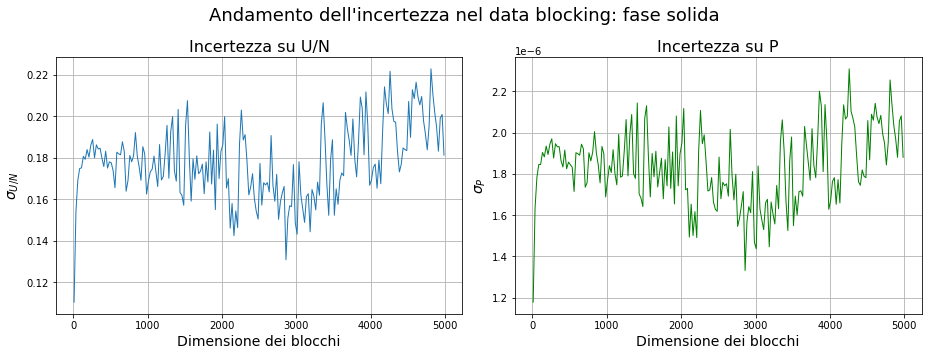

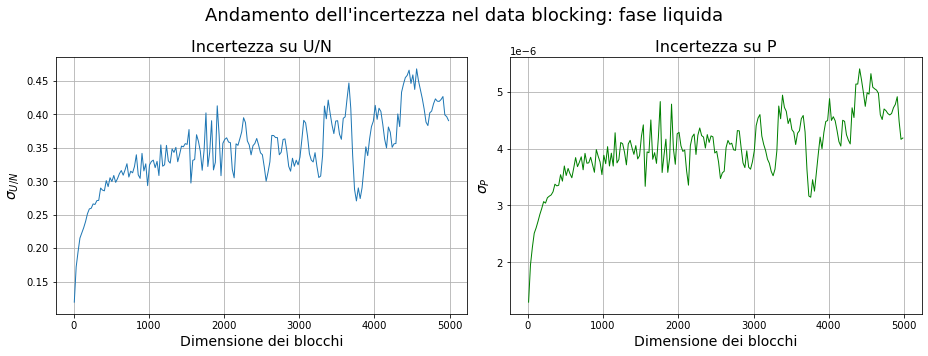

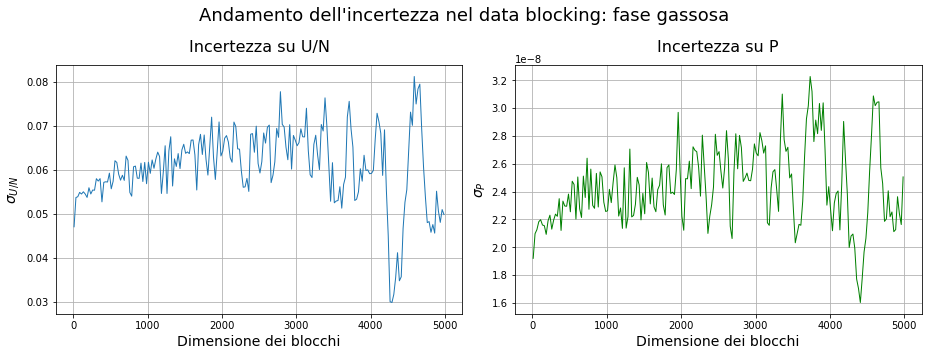

In [9]:
#Fase solida:
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(Block_size, error_solid_pot, lw=1)
plt.title('Incertezza su U/N',fontsize=16)
plt.xlabel('Dimensione dei blocchi',fontsize=14)
plt.ylabel('$\sigma_{U/N}$',fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Incertezza su P',fontsize=16)
plt.plot(Block_size, error_solid_pressure, lw=1, color='green')
plt.xlabel('Dimensione dei blocchi',fontsize=14)
plt.ylabel('$\sigma_{P}$',fontsize=14)
plt.grid(True)

plt.ticklabel_format(axis='both',scilimits=(0,5))
plt.suptitle('Andamento dell\'incertezza nel data blocking: fase solida',fontsize=18)
plt.tight_layout()


#Fase liquida:
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(Block_size, error_liquid_pot, lw=1)
plt.title('Incertezza su U/N',fontsize=16)
plt.xlabel('Dimensione dei blocchi',fontsize=14)
plt.ylabel(r'$\sigma_{U/N}$',fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Incertezza su P',fontsize=16)
plt.plot(Block_size, error_liquid_pressure, lw=1, color='green')
plt.xlabel('Dimensione dei blocchi',fontsize=14)
plt.ylabel(r'$\sigma_{P}$',fontsize=14)
plt.grid(True)
plt.ticklabel_format(axis='both',scilimits=(0,5))

plt.suptitle('Andamento dell\'incertezza nel data blocking: fase liquida',fontsize=18)
plt.tight_layout()


#Fase gassosa:
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(Block_size, error_gas_pot, lw=1)
plt.title('Incertezza su U/N',fontsize=16,pad=14)
plt.xlabel('Dimensione dei blocchi',fontsize=14)
plt.ylabel('$\sigma_{U/N}$',fontsize=14)
plt.ticklabel_format(axis='both',scilimits=(-5,5))
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Incertezza su P',fontsize=16,pad=14)
plt.plot(Block_size, error_gas_pressure, lw=1, color='green')
plt.xlabel('Dimensione dei blocchi',fontsize=14)
plt.ylabel('$\sigma_{P}$',fontsize=14)
plt.ticklabel_format(axis='both',scilimits=(2,5))
plt.grid(True)

plt.suptitle('Andamento dell\'incertezza nel data blocking: fase gassosa',fontsize=18)
plt.tight_layout()


plt.show()

Come si può notare dai grafici, l'incertezza statistica per taglie piccole è sottostimata. Dunque le medie di blocco, in tal caso, sono tra loro correlate. 
Aumentando il numero di dati per blocco, una volta che la taglia è sufficientemente grande si ha indipendenza statistica tra le medie delle osservabili.

Osservando i grafici in esame, una ragionevole dimensione per i blocchi è di 3000 misure per tutte e tre le fasi.

---

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

---

### Funzione di distribuzione radiale

Questa funzione esprime la probabilità di trovare una qualunque coppia di particelle a distanza $r$ confrontata con la medesima probabilità che si avrebbe nel caso di  particelle indipendenti (e quindi di un gas ideale). 
L'espressione usata per il calcolo di questa distribuzione è la seguente:

$$g(r)=\frac{1}{\rho N \Delta V(r)}\Bigg\langle \sum_j^N \sum_{i\neq j}^N \delta\big(r-|\vec{r}_i-\vec{r}_j|\big) \Bigg\rangle \quad\text{dove}\quad \Delta V(r) = \frac{4}{3} \pi \big[(r + dr)^3 − r^3 \big]$$

Da un punto di vista algoritmico la forma della $g(r)$ viene ottenuta suddividendo l'intervallo delle possibili distanze $[0,L_{box}/2]$ tra due particelle all'interno del box di simulazione in 100 sottointervalli
e, ad ogni step della simulazione, per ogni coppia che si trova alla distanza $r\in[r_i,r_{i+1}]$ vengono aggiunte due unità al bin $i-$esimo corrispondente.
Infine, utilizzando il metodo a blocchi e normalizzando per la quantità $\frac{1}{\rho N \Delta V(r)}$, si ottiene una stima della $g(r)$ con relativa incertezza.

---

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

---

### Calcolare la funzione di distribuzione radiale

Si implementa il metodo per determinare la distribuzione radiale delle particelle sia nell'algoritmo di Metropolis che nell'algoritmo di Verlet: questo si resetta ad ogni misura delle osservabili delle particelle.

In seguito si hanno i confronti fra i grafici della distribuzione radiale $g(r)$ per i due algoritmi in tutte e tre le fasi: quese vengono calcolate simulando su 50 blocchi.

In [10]:
data_MC_solid_g = np.loadtxt('MC/Solido/output_g.dat')
data_MD_solid_g = np.loadtxt('MD/Solido/output_g.dat')
data_MC_liquid_g = np.loadtxt('MC/Liquido/output_g.dat')
data_MD_liquid_g = np.loadtxt('MD/Liquido/output_g.dat')
data_MC_gas_g = np.loadtxt('MC/Gas/output_g.dat')
data_MD_gas_g = np.loadtxt('MD/Gas/output_g.dat')

bins = data_MC_solid_g[:, 0]

MC_solid_g = data_MC_solid_g[:, 1]
MC_solid_g_err = data_MC_solid_g[:, 2]

MD_solid_g = data_MD_solid_g[:, 1]
MD_solid_g_err = data_MD_solid_g[:, 2]

##########

MC_liquid_g = data_MC_liquid_g[:, 1]
MC_liquid_g_err = data_MC_liquid_g[:, 2]

MD_liquid_g = data_MD_liquid_g[:, 1]
MD_liquid_g_err = data_MD_liquid_g[:, 2]

##########

MC_gas_g = data_MC_gas_g[:, 1]
MC_gas_g_err = data_MC_gas_g[:, 2]

MD_gas_g = data_MD_gas_g[:, 1]
MD_gas_g_err = data_MD_gas_g[:, 2]

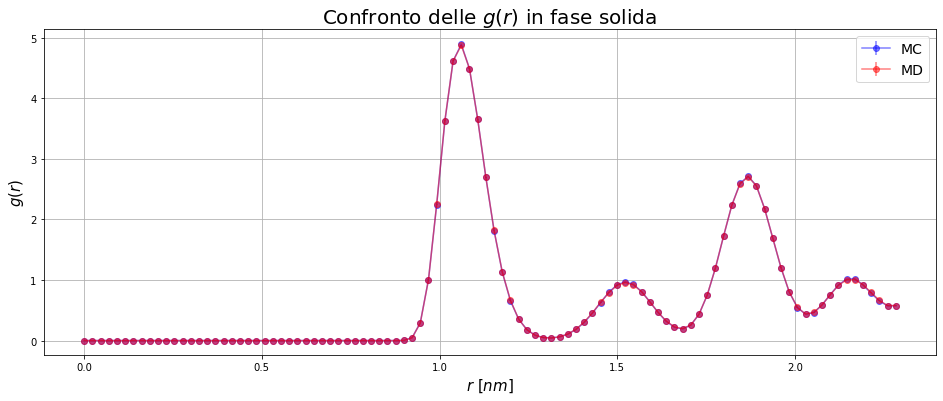

In [11]:
# Fase solida
fig, ax = plt.subplots(figsize=(16, 6))
plt.errorbar(bins, MC_solid_g, yerr=MC_solid_g_err, marker='.', markersize=12, color='blue', alpha=0.5,label='MC')
plt.errorbar(bins, MD_solid_g, yerr=MD_solid_g_err, marker='.', markersize=12, color='red', alpha=0.5,label='MD')

plt.xlabel('$r\,\,[nm]$', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)
plt.title('Confronto delle $g(r)$ in fase solida', fontsize=20)
plt.grid(True)
plt.legend(fontsize=14)

plt.show()

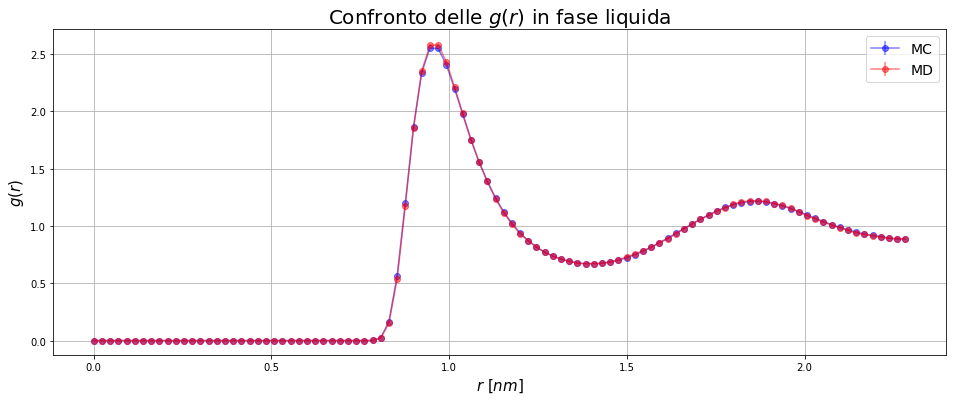

In [12]:
# Fase liquida
fig, ax = plt.subplots(figsize=(16, 6))
plt.errorbar(bins, MC_liquid_g, yerr=MC_liquid_g_err, marker='.', markersize=12, color='blue', alpha=0.5,label='MC')
plt.errorbar(bins, MD_liquid_g, yerr=MD_liquid_g_err, marker='.', markersize=12, color='red', alpha=0.5,label='MD')

plt.xlabel('$r\,\,[nm]$', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)
plt.title('Confronto delle $g(r)$ in fase liquida', fontsize=20)
plt.grid(True)
plt.legend(fontsize=14)

plt.show()

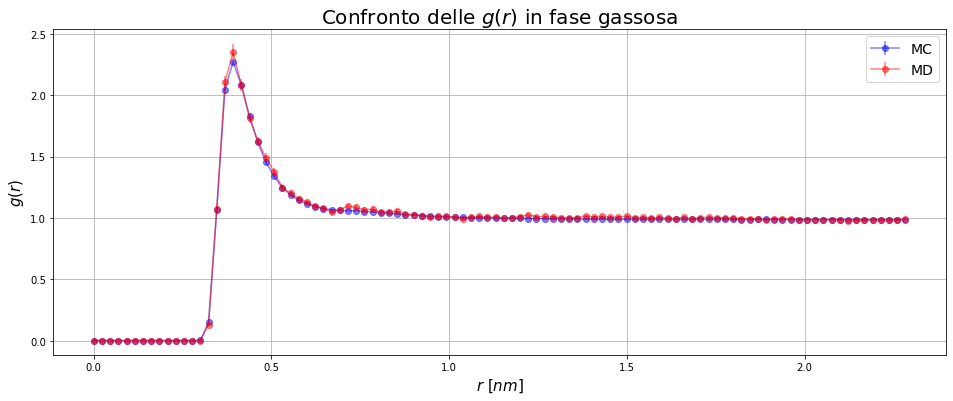

In [13]:
# Fase gassosa
fig, ax = plt.subplots(figsize=(16, 6))
plt.errorbar(bins, MC_gas_g, yerr=MC_gas_g_err, marker='.', markersize=12, color='blue', alpha=0.5,label='MC')
plt.errorbar(bins, MD_gas_g, yerr=MD_gas_g_err, marker='.', markersize=12, color='red', alpha=0.5,label='MD')

plt.xlabel('$r\,\,[nm]$', fontsize=15)
plt.ylabel('$g(r)$', fontsize=15)
plt.title('Confronto delle $g(r)$ in fase gassosa', fontsize=20)
plt.grid(True)
plt.legend(fontsize=14)

plt.show()

Da tutti e tre i grafici si nota una forte corrispondenza tra le curve della distribuzione radiale $g(r)$ prodotte dall'algoritmo di Metropolis e dall'algoritmo di Verlet. Questo è un risultato notevole, dato che questi due algoritmi agiscono in modo profondamente diverso: ciò indica come questi, seppur differenti, riescono a simulare in maniera corretta l'evoluzione temporale di un ensemble microcanonico.